## Importing the dataset




In [1]:
# import and upload dataset
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


## Getting to know the data

In [14]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# load dataset into dataframe
df = pd.read_csv('netflix_titles.csv')

# shows first five rows to get an overview of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
# displays number of rows and columns, data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [16]:
# this will tell us how many missing values each column has
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


director, cast, country, date added, rating, and durationa all contain missing values


## Data cleaning


In [17]:
# columns "show id" and "description" aren't useful for analysis and are therefore dropped
df.drop(columns=['show_id','description'], inplace = True)

In [18]:
# fills missing values in each column with "Unknown" or "Not rated"
df=df.fillna({'director':'Unknown',
              'cast':'Unknown',
              'country':'Unknown',
              'rating':'Not Rated',
              'duration':'Unknown'
})

In [19]:
# verifying that missing values are filled
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0
listed_in,0


The only column left with missing values is date_added

In [20]:
# Fills missing date_added values with the release year and "Unknown"
df['date_added'] = df['date_added'].fillna(df['release_year'].astype(str)+', Unknown')

In [21]:
# verifying that missing values are filled
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


All missing values have been removed or filled

## What are the most common Netflix content types ? (Moives vs TV Show)






In [22]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


## Which country has the most Netflix content?


In [23]:
df[df["country"] != "Unknown"]["country"].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


## What are the most common genres on Netflix?




In [24]:
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


## What is the trend on Netflix content addd per year?


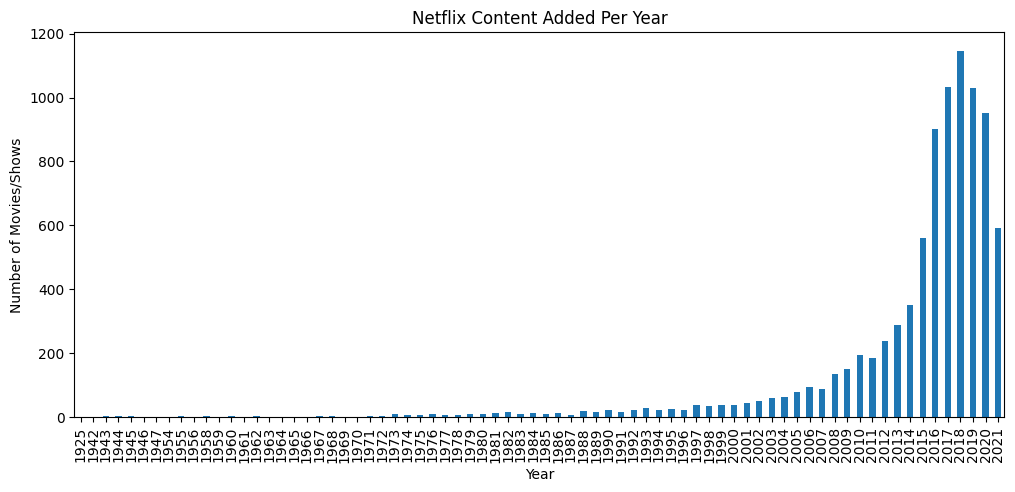

In [13]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.xlabel('Year')
plt.ylabel('Number of Movies/Shows')
plt.title('Netflix Content Added Per Year')
plt.show()